# Sign Glove

Ploting the Data we get from the Flex Sensors to visually see the difference between the signs

Import Libraries and connect to Google Drive

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from urllib.parse import quote, unquote

# generate accesss to the drive (=data)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This code loads flexsensor data from a CSV file that contains the measurements for each finger in a single column. The data is split to create separate columns for each finger and then converted to numeric values. Rows with missing values are removed and then scaling factors are calculated to ensure that the data from all fingers have a similar starting value. These scaling factors are applied to each sensor's data to normalise the data and make it more suitable for comparison.

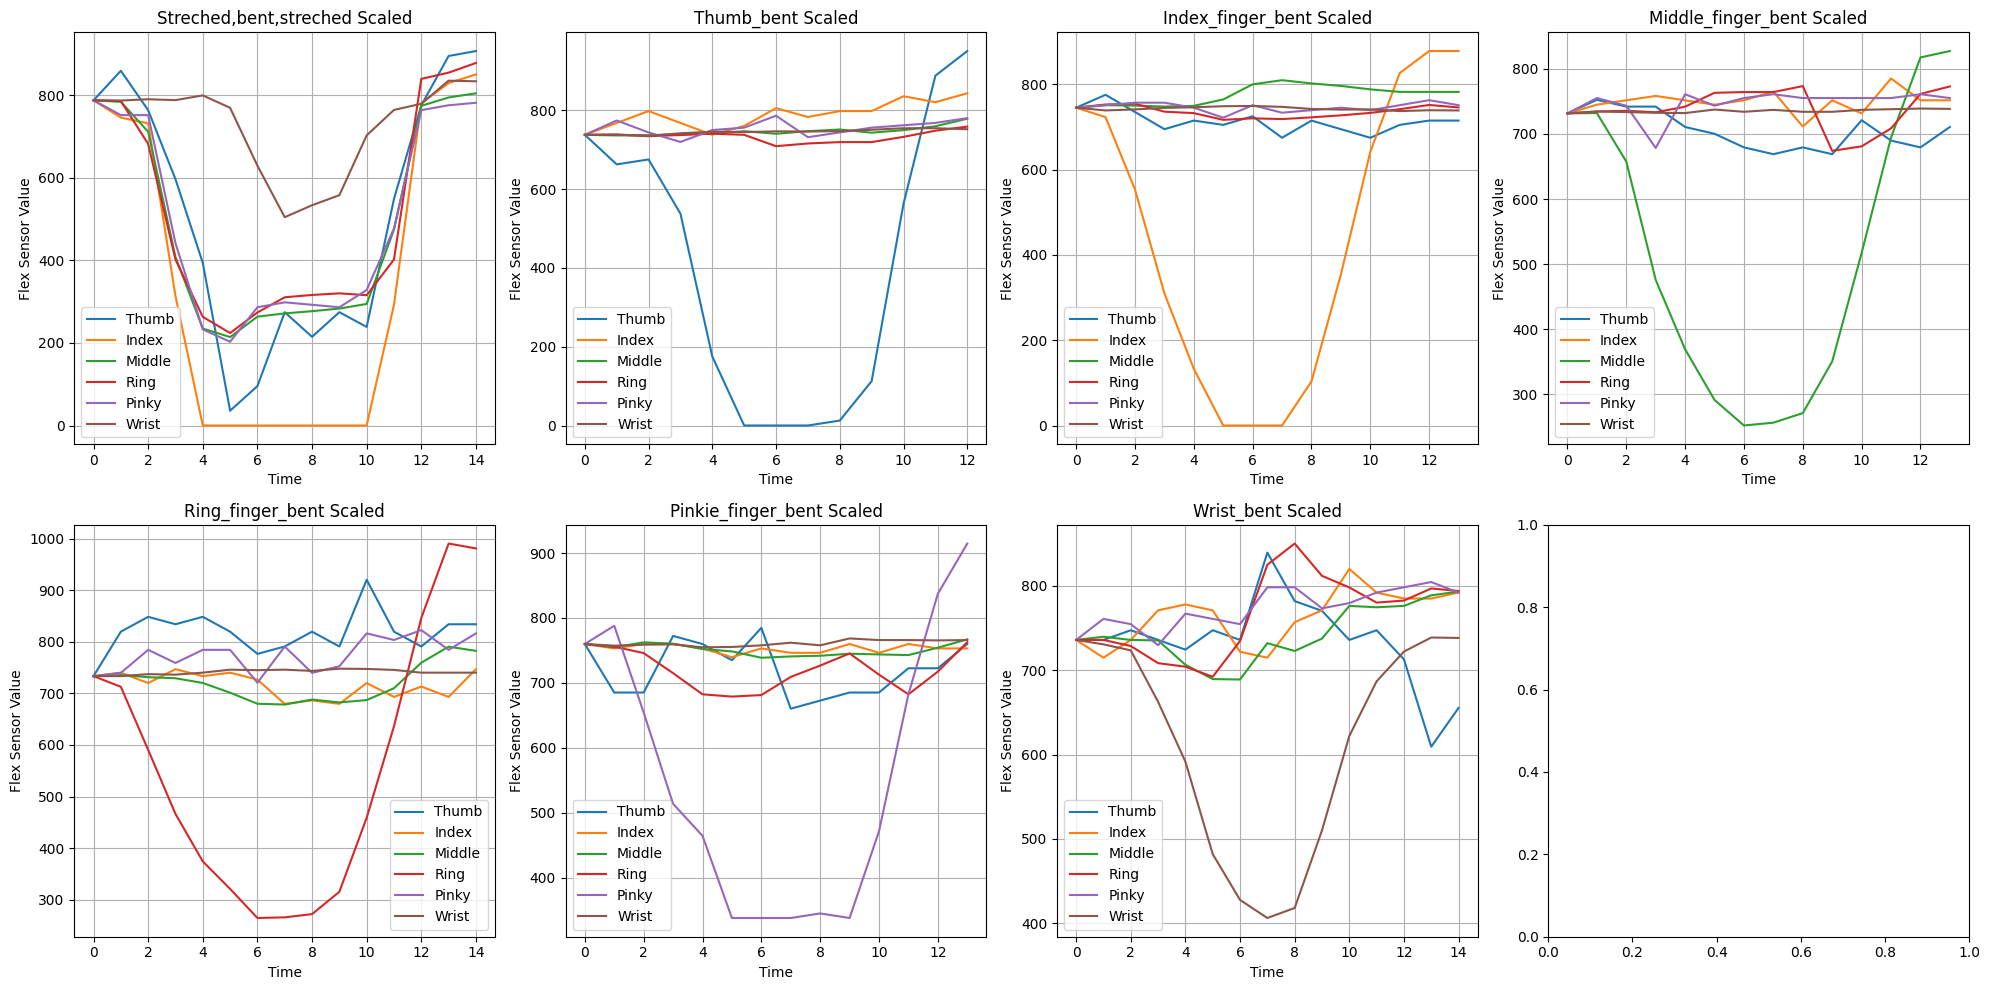

In [16]:
# Liste der Dateipfade
file_paths = ["/content/drive/MyDrive/Colab Notebooks/MCI /Sign Glove/Data/Finger/streched,bent,streched.csv",
              "/content/drive/MyDrive/Colab Notebooks/MCI /Sign Glove/Data/Finger/thumb_bent.csv",
              "/content/drive/MyDrive/Colab Notebooks/MCI /Sign Glove/Data/Finger/index_finger_bent.csv",
              "/content/drive/MyDrive/Colab Notebooks/MCI /Sign Glove/Data/Finger/middle_finger_bent.csv",
              "/content/drive/MyDrive/Colab Notebooks/MCI /Sign Glove/Data/Finger/ring_finger_bent.csv",
              "/content/drive/MyDrive/Colab Notebooks/MCI /Sign Glove/Data/Finger/pinkie_finger_bent.csv",
              "/content/drive/MyDrive/Colab Notebooks/MCI /Sign Glove/Data/Finger/wrist_bent.csv"]


# Create subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Process and plot the data for each file
for i, file_path in enumerate(file_paths):
    if i >= 8:
        break
    # Encode the file path
    encoded_file_path = quote(file_path, safe='')

    # Decode the file path
    decoded_file_path = unquote(encoded_file_path)

    # Read the data
    df = pd.read_csv(decoded_file_path)

    # Split the single column into multiple columns
    df[['thumb', 'index', 'middle', 'ring', 'pinky', 'wrist']] = df['thumb;index;middle;ring;pinkie;wrist'].str.split(';', expand=True)

    # Convert sensor values to numeric, handle errors with coerce
    df[['thumb', 'index', 'middle', 'ring', 'pinky', 'wrist']] = df[['thumb', 'index', 'middle', 'ring', 'pinky', 'wrist']].apply(pd.to_numeric, errors='coerce')

    # Drop any rows with missing values
    df.dropna(inplace=True)

    # Calculate the mean of initial values for all sensors
    initial_mean = df[['thumb', 'index', 'middle', 'ring', 'pinky', 'wrist']].iloc[0].mean()

    # Calculate scaling factors for each sensor
    scaling_factors = initial_mean / df[['thumb', 'index', 'middle', 'ring', 'pinky', 'wrist']].iloc[0]

    # Apply scaling to each sensor's data
    for finger in ['thumb', 'index', 'middle', 'ring', 'pinky', 'wrist']:
        df[finger] *= scaling_factors[finger]

    # Plotting flex sensor data for each finger on the corresponding subplot
    row = i // 4
    col = i % 4
    for finger in ['thumb', 'index', 'middle', 'ring', 'pinky', 'wrist']:
        axs[row, col].plot(df.index, df[finger], label=finger.capitalize())
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Flex Sensor Value')
    axs[row, col].set_title(f'{decoded_file_path.split("/")[-1].split(".")[0].capitalize()} Scaled')
    axs[row, col].legend()
    axs[row, col].grid(True)

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()